In [1]:
file_path = '/Users/lfinkbeiner/Documents/GitHub/HERA/beam/'
beam_origin = 'HERA_4.9m_E-pattern_151MHz.txt'
beam_destination = 'ant1_s2'

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from RIMEz import beam_models
import numpy as np
import healpy as hp
from spin1_beam_model import cst_processing, jones_matrix_field

In [3]:
processor = cst_processing.CSTDataProcessor(
    [file_path + beam_origin,
    file_path + beam_origin,
    file_path + beam_origin],
    np.array([150e6, 151e6, 152e6]),
    1, 1e-4
)

In [4]:
processor.compute_spin1_harmonics()
processor.write_model_data(file_path, beam_destination)
spline_beam_func = beam_models.model_data_to_spline_beam_func(file_path + beam_destination + '.h5', np.array([150e6, 151e6, 152e6]))

//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [5]:
import healpy as hp
#nside = 16, 32, 64, 128...
nside = 128

# healpix does the interpolation for you?
theta, phi = hp.pix2ang(nside,np.arange(12 * nside * nside))
az = phi
alt = np.pi / 2 - theta
J = spline_beam_func(150e6, alt, az)

In [6]:
# Current labels
# 0, 0 : xy
# 1, 0 : xx
# 0, 1 : yy
# 1, 1 : yx

J_abs = np.abs(J)
print(J_abs)
J_abs.shape

[[[0.00281558 0.99816552]
  [0.99816633 0.00251133]]

 [[0.00254597 0.99816624]
  [0.99816313 0.00285542]]

 [[0.00253712 0.99816399]
  [0.99816316 0.00284353]]

 ...

 [[0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]]]


(196608, 2, 2)

<IPython.core.display.Javascript object>


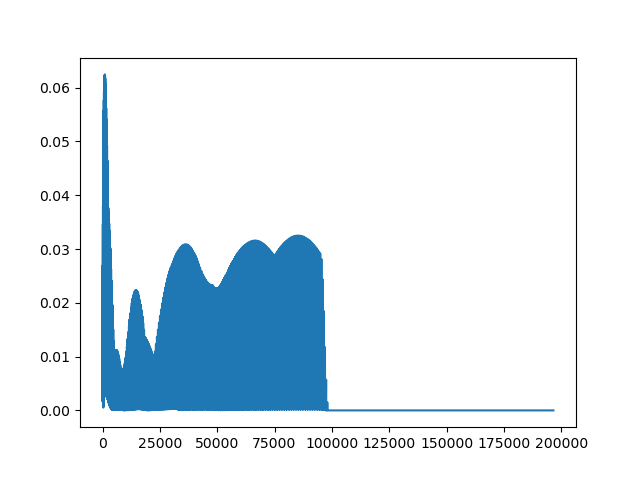

In [28]:
plt.plot(J_abs[:, 0, 0]) # xy

<IPython.core.display.Javascript object>


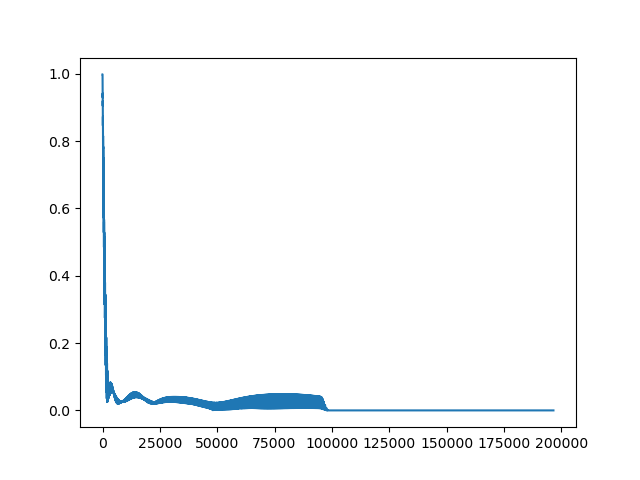

In [29]:
plt.plot(J_abs[:, 0, 1]) # yy

<IPython.core.display.Javascript object>


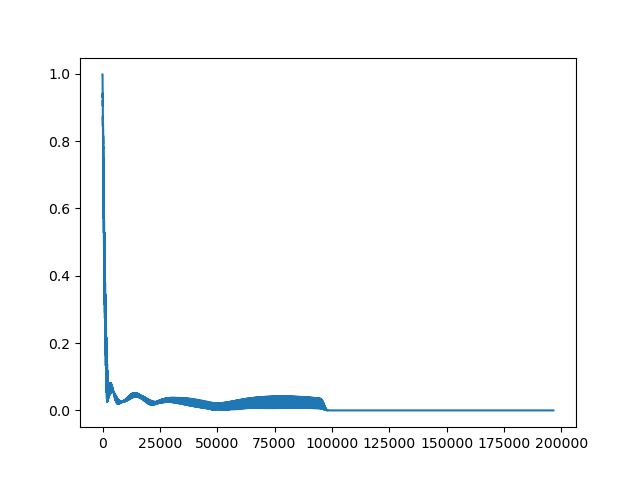

In [30]:
plt.plot(J_abs[:, 1, 0]) # xy

<IPython.core.display.Javascript object>


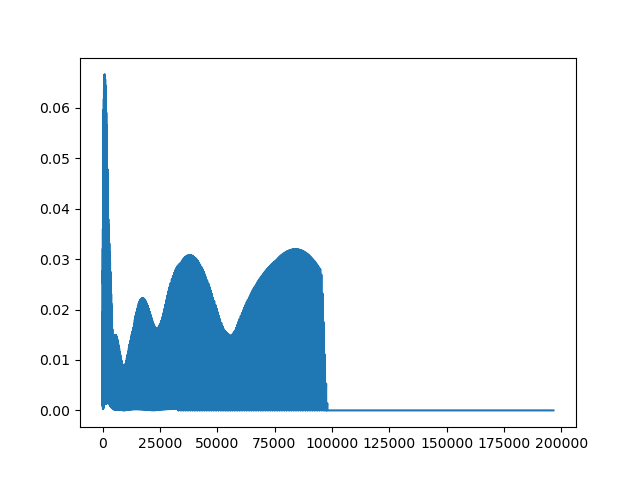

In [31]:
plt.plot(J_abs[:, 1, 1]) # yx

<IPython.core.display.Javascript object>


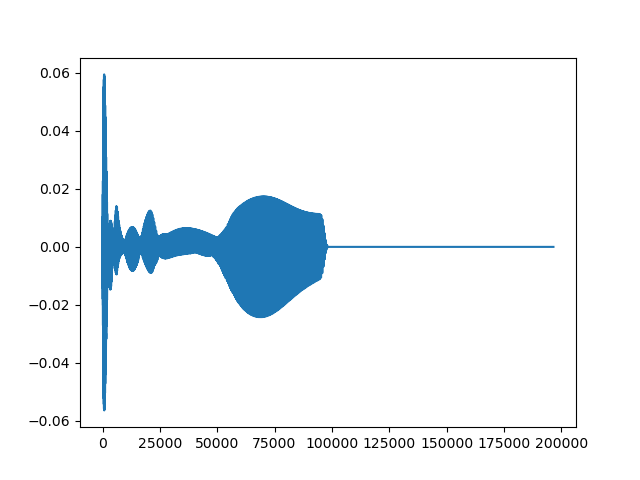

In [32]:
plt.plot([J_abs[i][1][1] - J_abs[i][0][0] for i in range(len(J_abs))]) # yx - xy

<IPython.core.display.Javascript object>


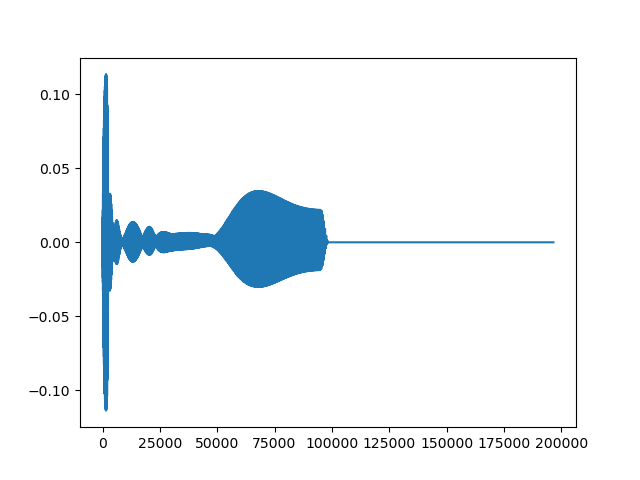

In [33]:
plt.plot([J_abs[i][0][1] - J_abs[i][1][0] for i in range(len(J_abs))]) # yy - xx

<IPython.core.display.Javascript object>


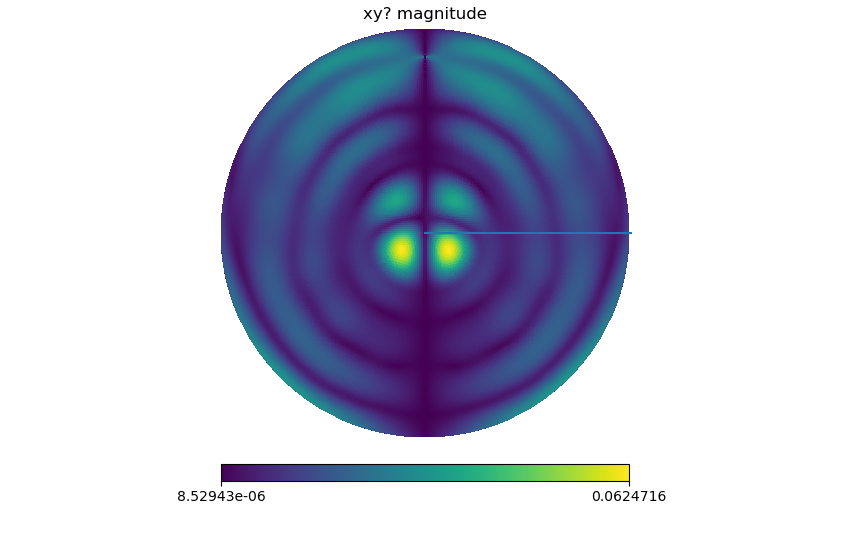

In [13]:
xy_orth = hp.orthview(np.abs(J[:, 0, 0]), rot=[0, 90],
                      half_sky=True, title='xy? magnitude', return_projected_map = True)

In [14]:
print(xy_orth)
print(xy_orth.shape)
print(min(xy_orth[:, 0]))
print(max(xy_orth[0, :]))
# Well, that only increased my confusion.

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]
(800, 800)
-inf
-inf


<IPython.core.display.Javascript object>


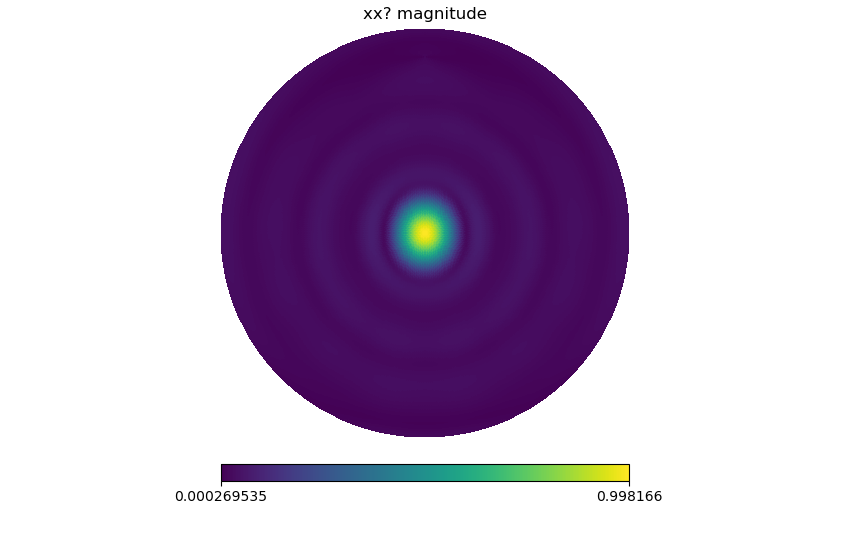

In [15]:
xx_orth = hp.orthview(np.abs(J[:, 1, 0]), rot=[0, 90],
                      half_sky=True, title='xx? magnitude', return_projected_map = True)

In [16]:
print(xx_orth)
print(xx_orth.shape)
print(min(xx_orth[:, 0]))
print(max(xx_orth[0, :]))
# Still nothing.

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]
(800, 800)
-inf
-inf


<IPython.core.display.Javascript object>


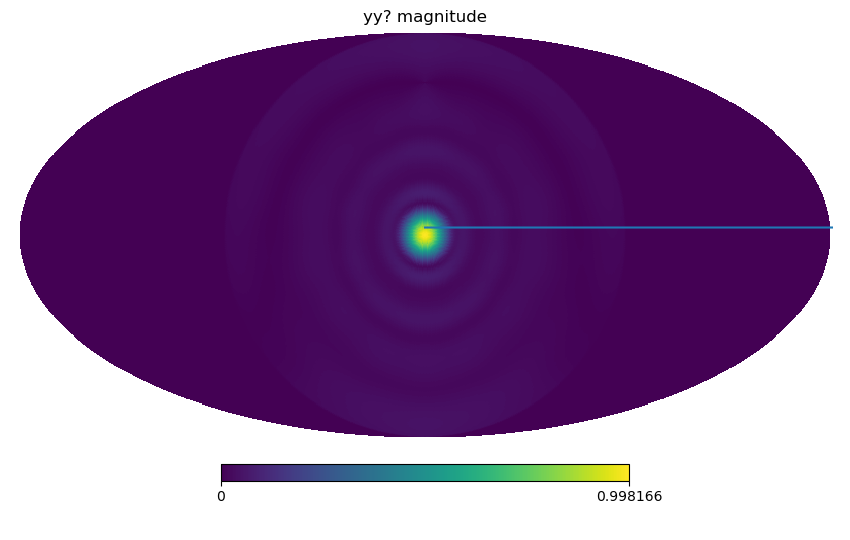

In [36]:
yy_moll = hp.mollview(np.abs(J[:, 0, 1]), rot=[0, 90],
                        title='yy? magnitude', return_projected_map = True)

In [26]:
print(yy_moll)
print(yy_moll.shape)
print(min(yy_moll[:, 0]))
print(max(yy_moll[0, :]))
# Well, the dimension is different, surely a simple consequence of the projection.
# None of my quantities is finite, though...

m = max(yy_moll[0, :])

for arr in yy_moll:
    if max(arr) > m:
        m = max(arr)

print(m)

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]
(400, 800)
-inf
-inf
0.998166239614785


<IPython.core.display.Javascript object>


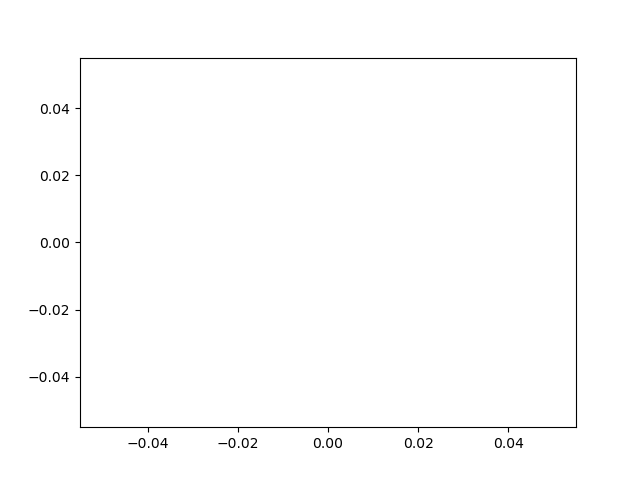

In [47]:
plt.plot(yy_moll[:, 0])

<IPython.core.display.Javascript object>


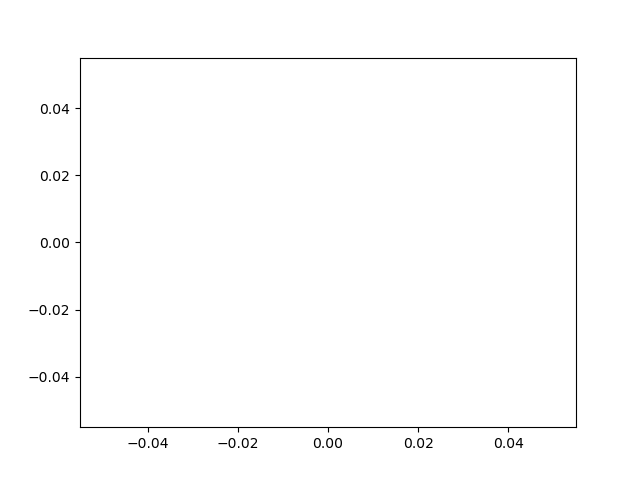

In [48]:
plt.plot(yy_moll[0, :])

<IPython.core.display.Javascript object>


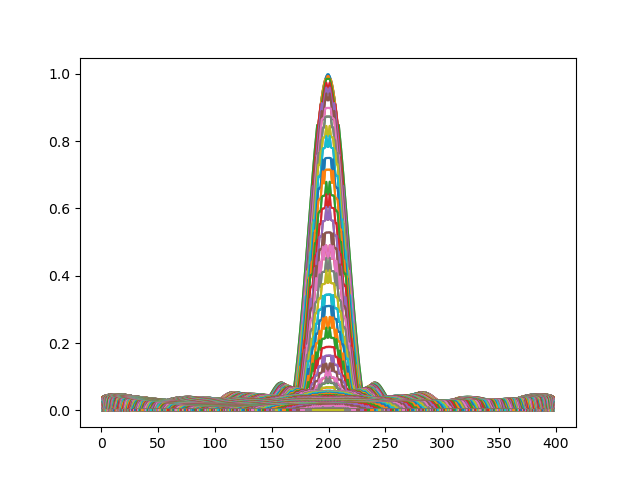

In [49]:
plt.plot(yy_moll)

In [39]:
test_index = hp.get_interp_val(np.abs(J[:, 0, 1]), -80, 60, False, True)

In [41]:
lat = np.linspace(-90, 90, 1000)
lon = np.linspace(-180, 180, 1000)

<IPython.core.display.Javascript object>


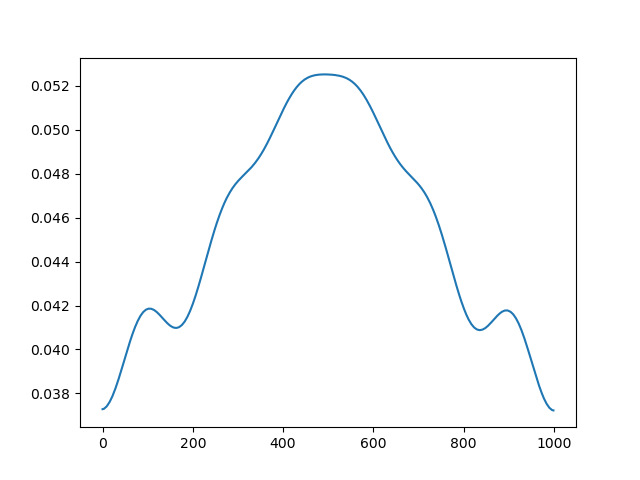

In [45]:
plt.plot(hp.get_interp_val(np.abs(J[:, 0, 1]), lat, 60, False, True))

<IPython.core.display.Javascript object>


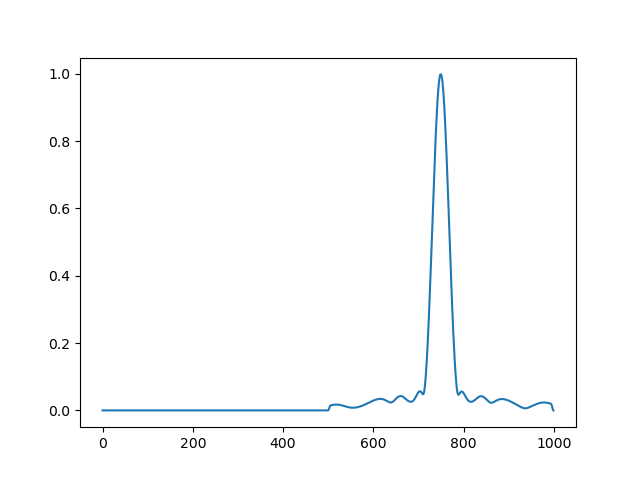

In [46]:
plt.plot(hp.get_interp_val(np.abs(J[:, 0, 1]), -80, lon, False, True))

In [65]:
import rotations

In [52]:
#rotations.eq_to_topo(rotations.lat, rotations.lon, rotations.lat)

TypeError: eq_to_topo() missing 1 required positional argument: 'lst'

In [66]:
el, be = rotations.eq_to_gal(rotations.lat, rotations.lon)
hp.get_interp_val(np.abs(J[:, 0, 1]), 0, np.radians(90 - az), False, True)

AttributeError: module 'rotations' has no attribute 'eq_to_gal'

In [60]:
hp.get_interp_val(np.abs(J[:, 1, 0]), 0, np.radians(90 - az), False, True)

0.018715215622486205

In [61]:
hp.get_interp_val(np.abs(J[:, 0, 0]), 0, np.radians(90 - az), False, True)

0.00031760157775480064

In [62]:
hp.get_interp_val(np.abs(J[:, 1, 1]), 0, np.radians(90 - az), False, True)

0.000150281692616144